### Importing the libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset


In [3]:
data = pd.read_csv("Amazon Sales data.csv")

In [4]:
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [5]:
data.shape

(100, 14)

### Average Units Sold by Region


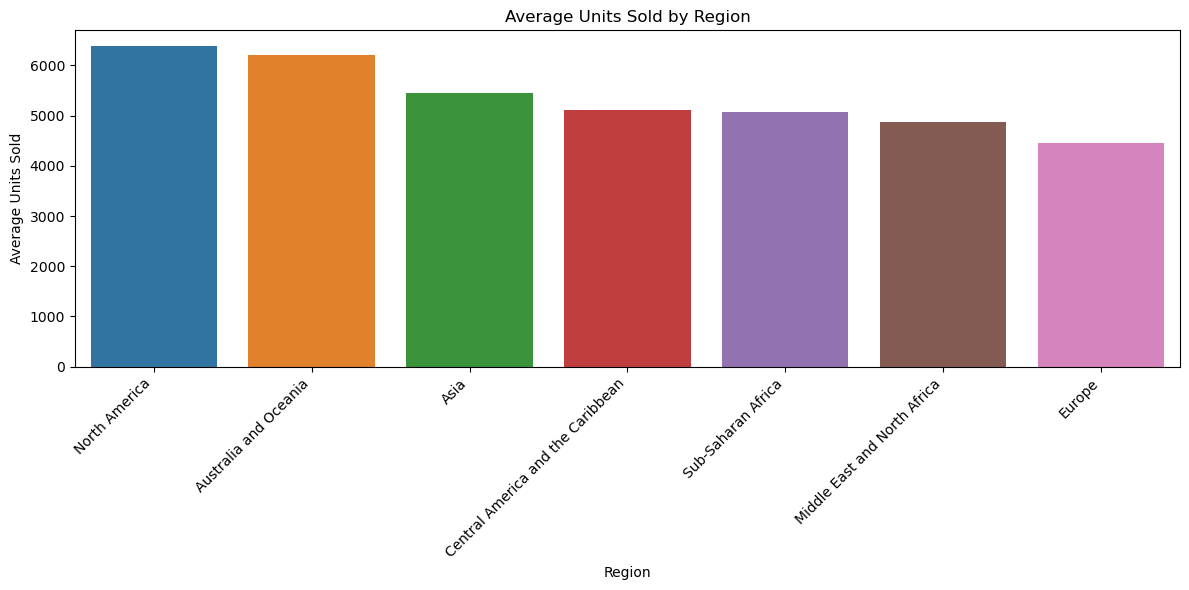

In [6]:
region_units = data.groupby('Region')['Units Sold'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=region_units.index, y=region_units.values)
plt.title('Average Units Sold by Region')
plt.xlabel('Region')
plt.ylabel('Average Units Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Average Units Sold by Item Type


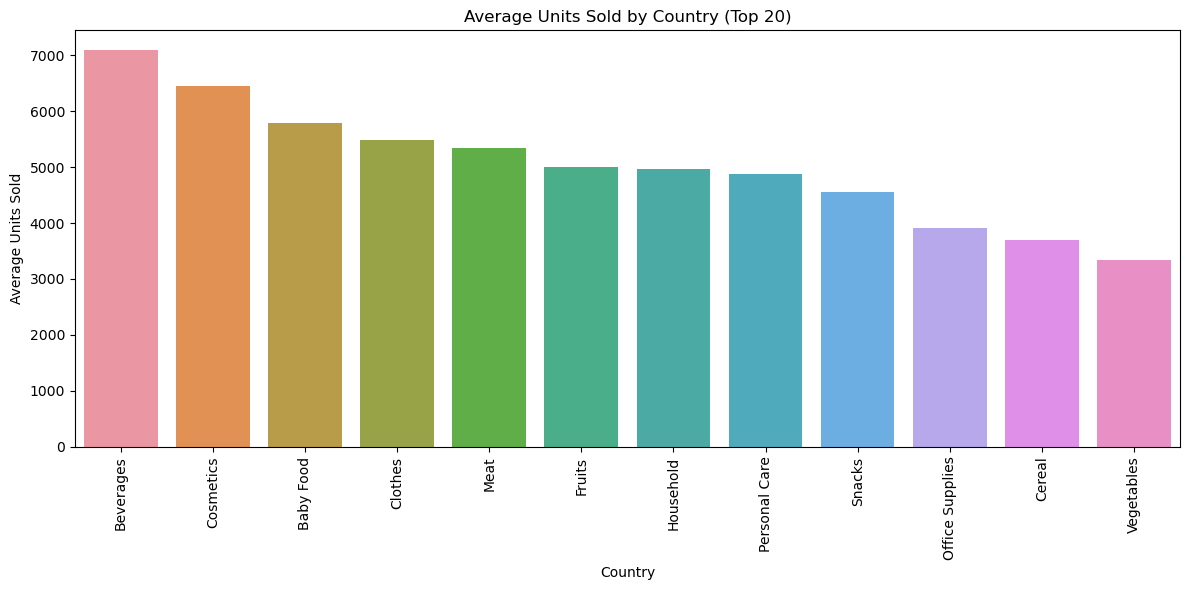

In [7]:
country_units = data.groupby('Item Type')['Units Sold'].mean().sort_values(ascending=False).head(20)
plt.figure(figsize=(12, 6))
sns.barplot(x=country_units.index, y=country_units.values)
plt.title('Average Units Sold by Country (Top 20)')
plt.xlabel('Country')
plt.ylabel('Average Units Sold')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Average Units Sold by Country (Top 20)


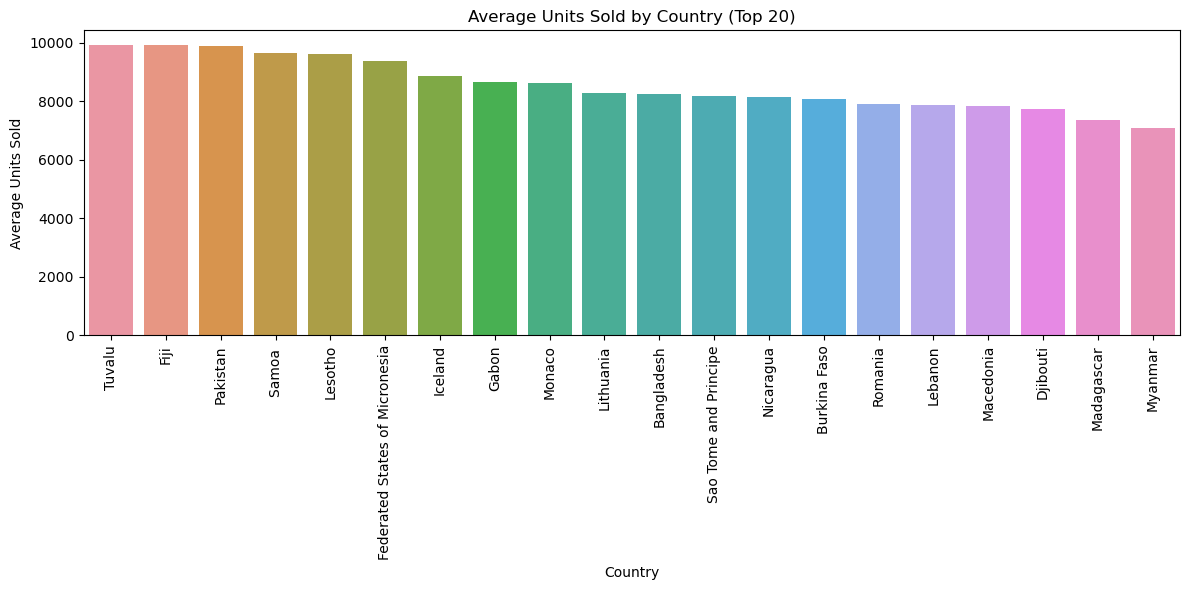

In [8]:
country_units = data.groupby('Country')['Units Sold'].mean().sort_values(ascending=False).head(20)
plt.figure(figsize=(12, 6))
sns.barplot(x=country_units.index, y=country_units.values)
plt.title('Average Units Sold by Country (Top 20)')
plt.xlabel('Country')
plt.ylabel('Average Units Sold')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Monthly Sales


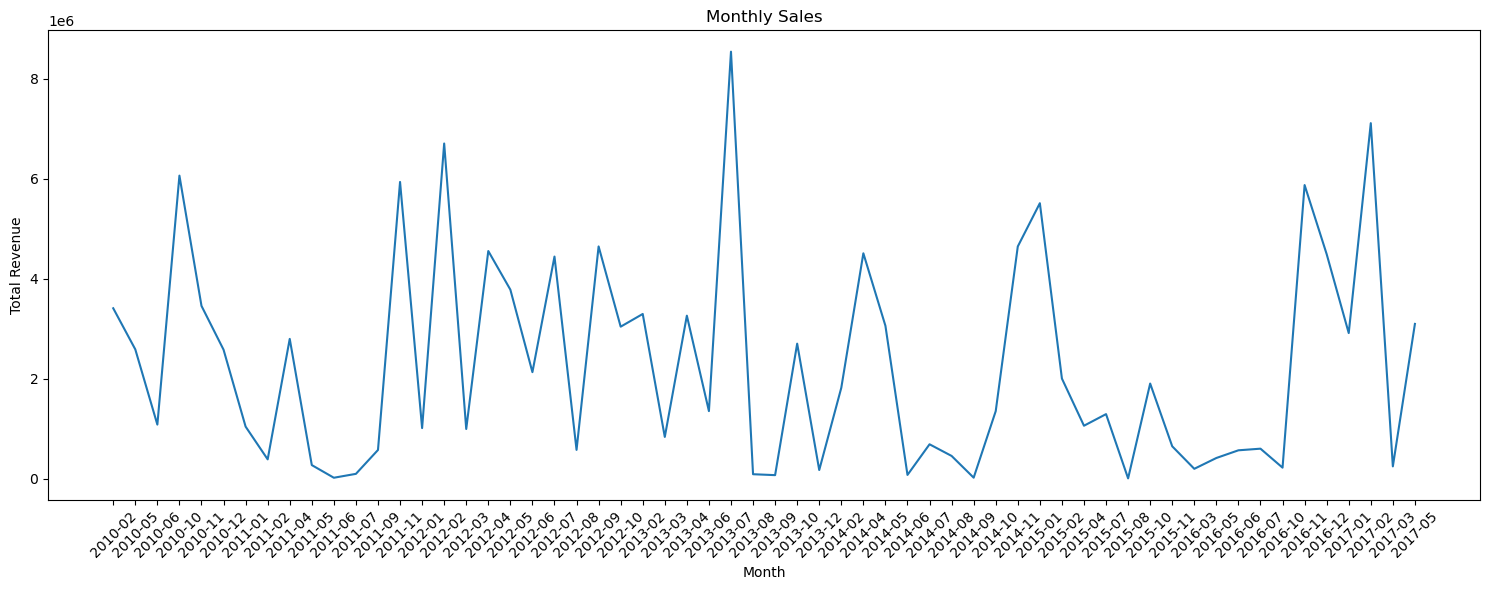

In [9]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Month'] = data['Order Date'].dt.to_period('M')
data['Year'] = data['Order Date'].dt.year
monthly_sales = data.groupby('Month')['Total Revenue'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].astype(str)
plt.figure(figsize=(15, 6))
plt.plot(monthly_sales['Month'], monthly_sales['Total Revenue'])
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Yearly Sales


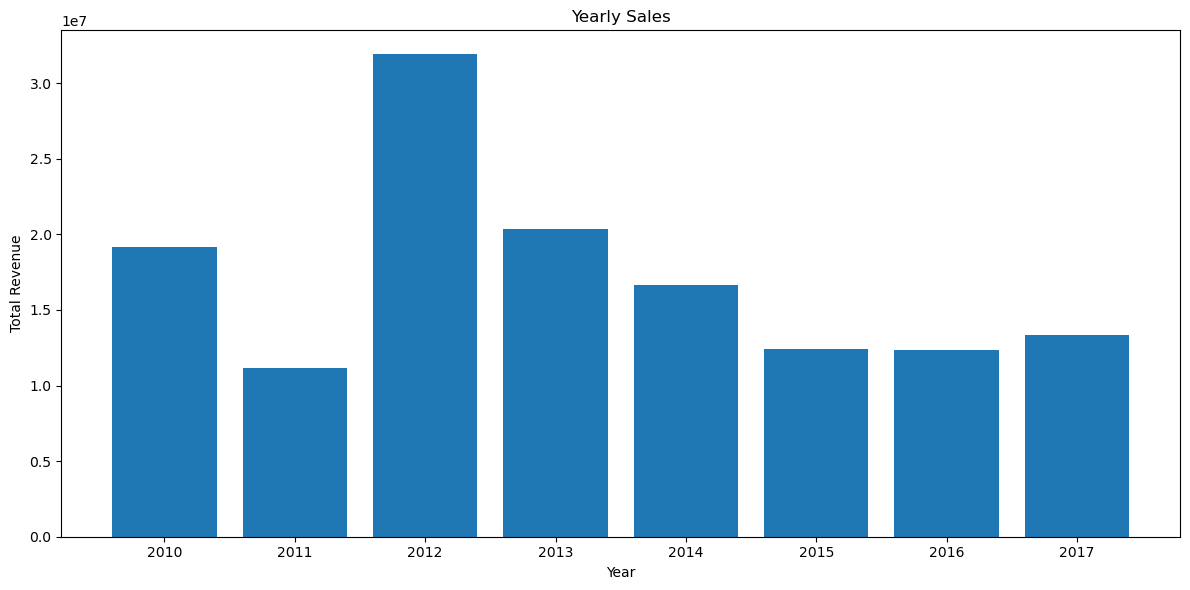

In [10]:
yearly_sales = data.groupby('Year')['Total Revenue'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.bar(yearly_sales['Year'], yearly_sales['Total Revenue'])
plt.title('Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()

### Offline vs Online Sales Through the Years


<Figure size 1200x600 with 0 Axes>

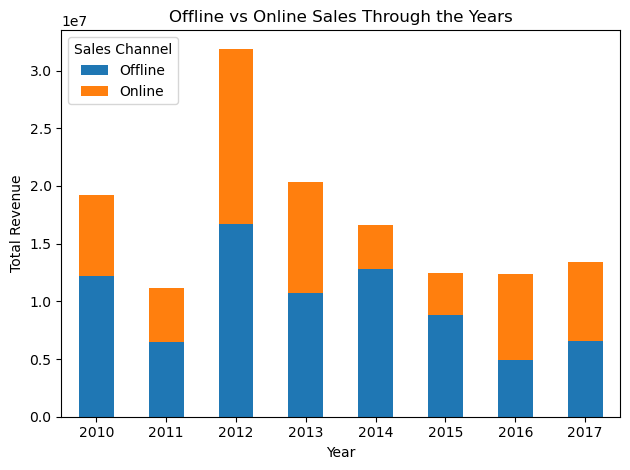

2010: Online 36.20%, Offline 63.80%
2011: Online 41.70%, Offline 58.30%
2012: Online 47.76%, Offline 52.24%
2013: Online 47.32%, Offline 52.68%
2014: Online 23.15%, Offline 76.85%
2015: Online 29.31%, Offline 70.69%
2016: Online 60.35%, Offline 39.65%
2017: Online 51.24%, Offline 48.76%


In [11]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Year'] = data['Order Date'].dt.year
sales_by_channel = data.groupby(['Year', 'Sales Channel'])['Total Revenue'].sum().unstack()
plt.figure(figsize=(12, 6))
sales_by_channel.plot(kind='bar', stacked=True)
plt.title('Offline vs Online Sales Through the Years')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.legend(title='Sales Channel', loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
for year in sales_by_channel.index:
    total = sales_by_channel.loc[year].sum()
    online_percent = (sales_by_channel.loc[year, 'Online'] / total) * 100
    offline_percent = (sales_by_channel.loc[year, 'Offline'] / total) * 100
    print(f"{year}: Online {online_percent:.2f}%, Offline {offline_percent:.2f}%")

### Top 20 Countries by Total Revenue


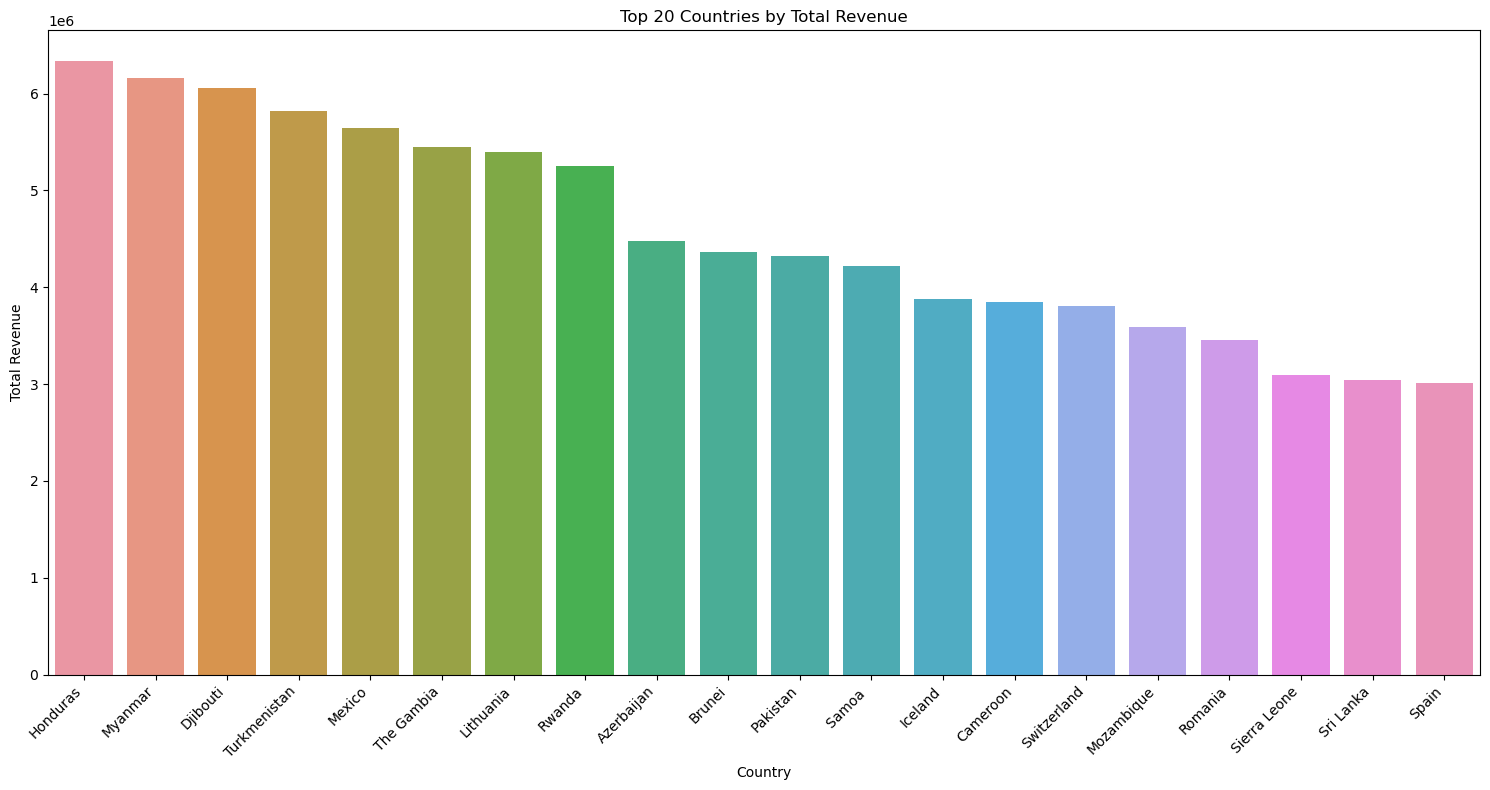

Top 5 Countries by Total Revenue:
Honduras: $6,336,545.48
Myanmar: $6,161,257.90
Djibouti: $6,052,890.86
Turkmenistan: $5,822,036.20
Mexico: $5,643,356.55


In [13]:
country_revenue = data.groupby('Country')['Total Revenue'].sum().sort_values(ascending=False)
top_20_countries = country_revenue.head(20)
plt.figure(figsize=(15, 8))
sns.barplot(x=top_20_countries.index, y=top_20_countries.values)
plt.title('Top 20 Countries by Total Revenue')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("Top 5 Countries by Total Revenue:")
for country, revenue in top_20_countries.head().items():
    print(f"{country}: ${revenue:,.2f}")

### Regions by Total Revenue


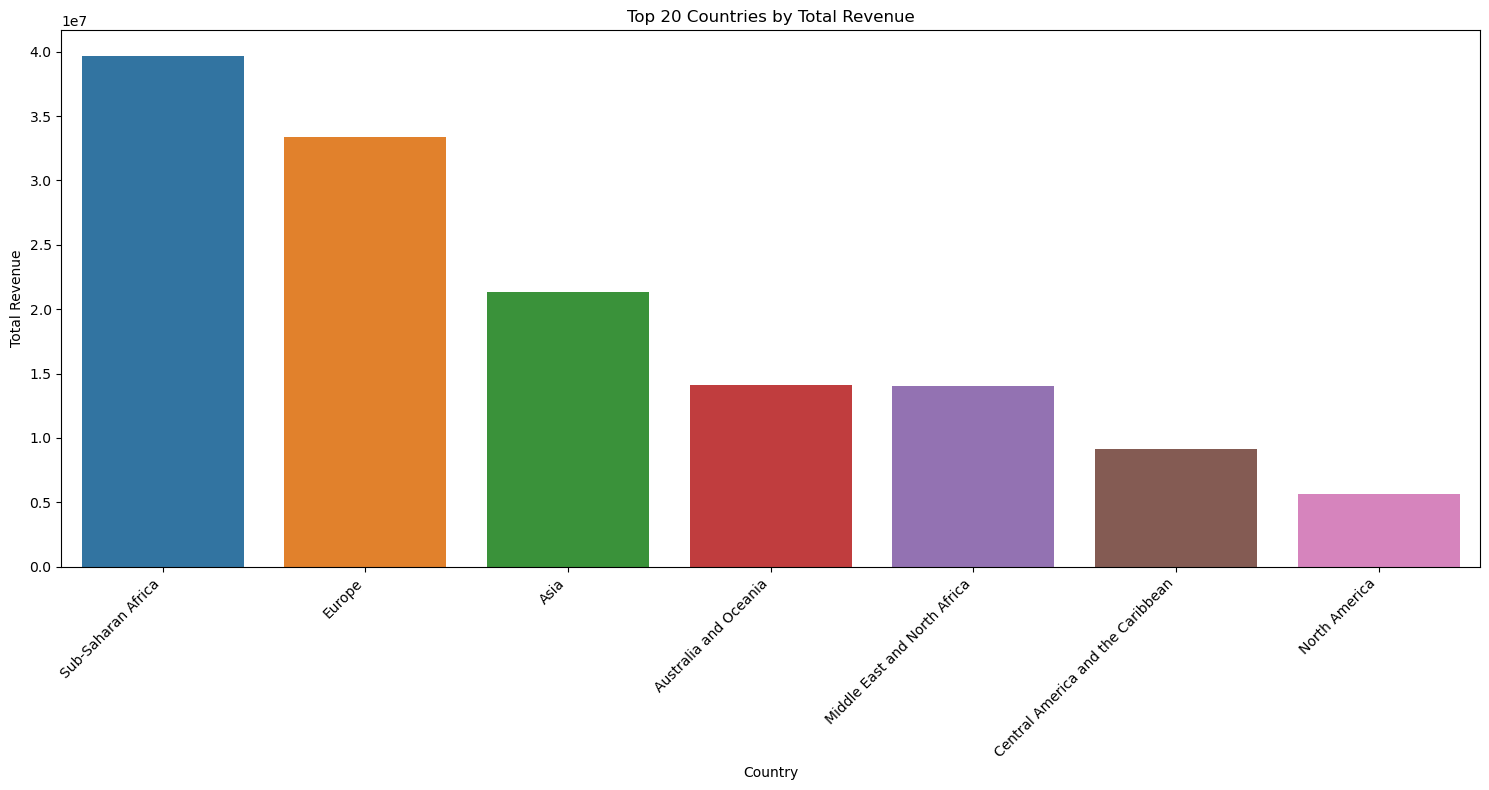

Top 5 Countries by Total Revenue:
Sub-Saharan Africa: $39,672,031.43
Europe: $33,368,932.11
Asia: $21,347,091.02
Australia and Oceania: $14,094,265.13
Middle East and North Africa: $14,052,706.58


In [17]:
country_revenue = data.groupby('Region')['Total Revenue'].sum().sort_values(ascending=False)
top_20_countries = country_revenue.head(7)
plt.figure(figsize=(15, 8))
sns.barplot(x=top_20_countries.index, y=top_20_countries.values)
plt.title('Top 20 Countries by Total Revenue')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("Top 5 Countries by Total Revenue:")
for country, revenue in top_20_countries.head().items():
    print(f"{country}: ${revenue:,.2f}")

### Processing Time vs Total Profit


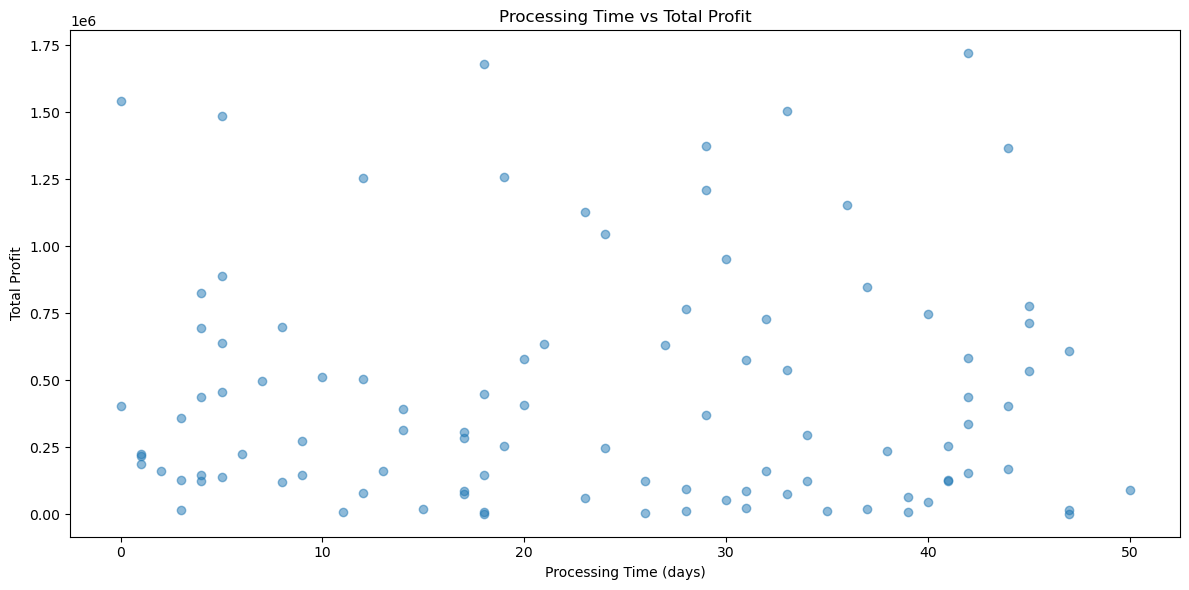

Correlation coefficient between Processing Time and Total Profit: 0.01


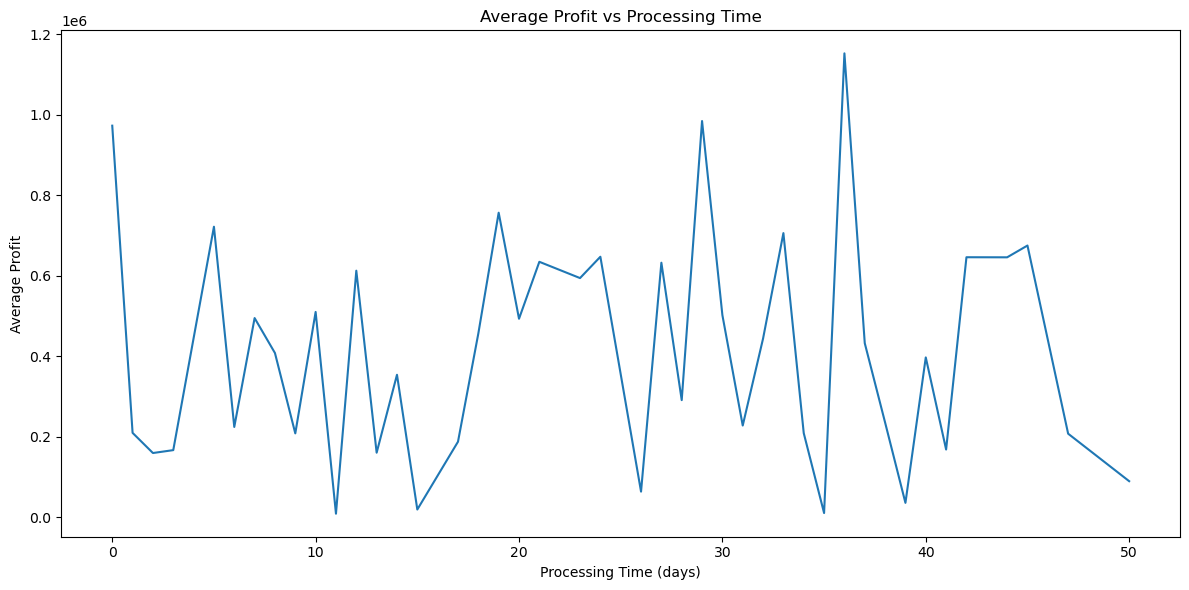

In [15]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])
data['Processing Time'] = (data['Ship Date'] - data['Order Date']).dt.days
plt.figure(figsize=(12, 6))
plt.scatter(data['Processing Time'], data['Total Profit'], alpha=0.5)
plt.title('Processing Time vs Total Profit')
plt.xlabel('Processing Time (days)')
plt.ylabel('Total Profit')
plt.tight_layout()
plt.show()
correlation = data['Processing Time'].corr(data['Total Profit'])
print(f"Correlation coefficient between Processing Time and Total Profit: {correlation:.2f}")
avg_profit = data.groupby('Processing Time')['Total Profit'].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(avg_profit['Processing Time'], avg_profit['Total Profit'])
plt.title('Average Profit vs Processing Time')
plt.xlabel('Processing Time (days)')
plt.ylabel('Average Profit')
plt.tight_layout()
plt.show()

### Processing Time vs Units Sold


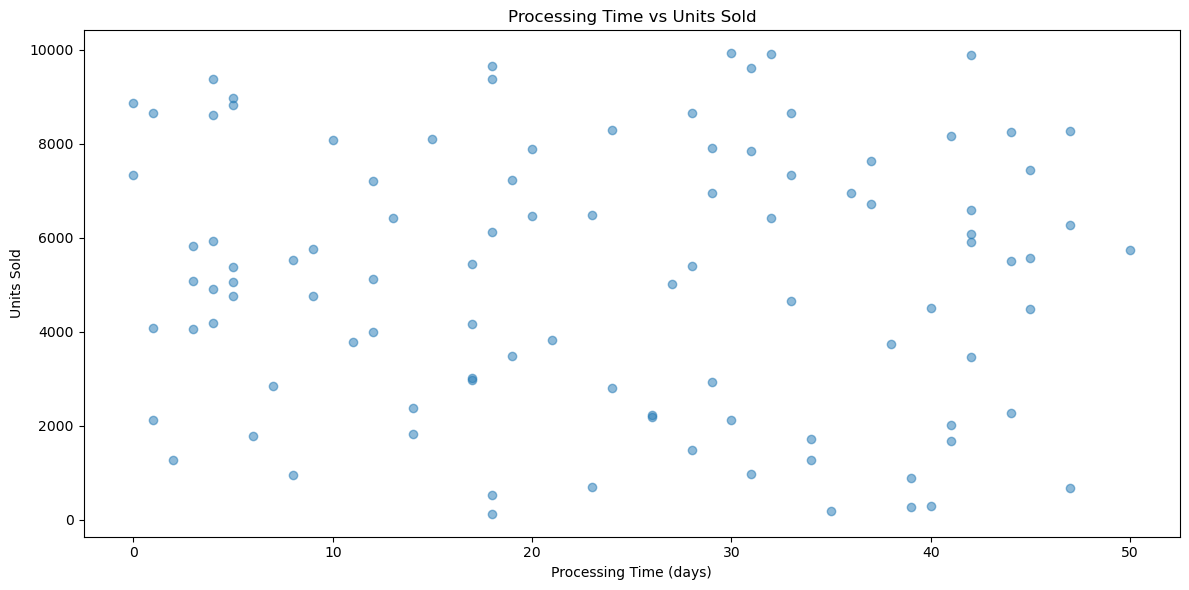

Correlation coefficient between Processing Time and Units Sold: -0.05


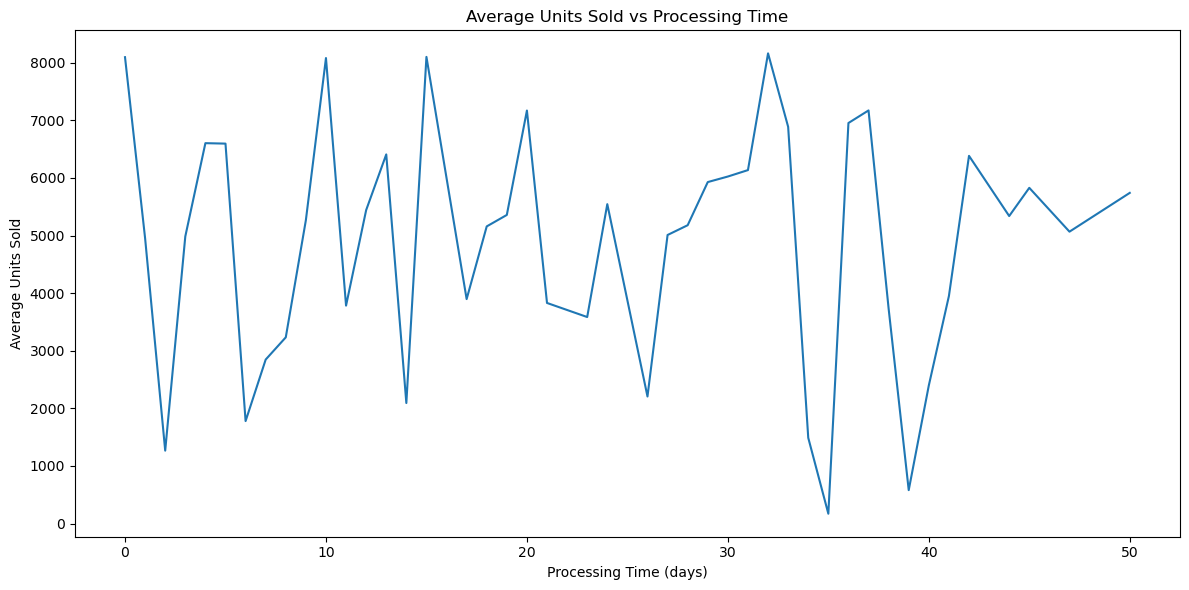

In [16]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])
data['Processing Time'] = (data['Ship Date'] - data['Order Date']).dt.days
plt.figure(figsize=(12, 6))
plt.scatter(data['Processing Time'], data['Units Sold'], alpha=0.5)
plt.title('Processing Time vs Units Sold')
plt.xlabel('Processing Time (days)')
plt.ylabel('Units Sold')
plt.tight_layout()
plt.show()
correlation = data['Processing Time'].corr(data['Units Sold'])
print(f"Correlation coefficient between Processing Time and Units Sold: {correlation:.2f}")
avg_units = data.groupby('Processing Time')['Units Sold'].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(avg_units['Processing Time'], avg_units['Units Sold'])
plt.title('Average Units Sold vs Processing Time')
plt.xlabel('Processing Time (days)')
plt.ylabel('Average Units Sold')
plt.tight_layout()
plt.show()

# Processing Time has no correlation with Units Sold and Total Profit
